# Myntra (Buy Me That Look!)
### An Approach for recommending Fashion Products

[Research Paper](https://arxiv.org/pdf/2008.11638.pdf)

## Problem Statement

<a href="https://imgur.com/FEklYUC"><img src="https://i.imgur.com/FEklYUC.png" title="source: imgur.com" /></a>

- The rise of e-commerce websites in India has led to an increase in online shopping throughout the country. Fashion items are the most sought after in the e-commerce market. 
- A robust, effective, and efficient recommendation system for fashion items could lead to an increase in revenue, better customer engagement, and experience. What makes this approach novel is the ability to detect multiple products from a given Product Display page and recommend similar items to the user. 
- A Product Display Page (PDP), is a web-page that presents an image of the product/products worn by a model or a standalone picture of the product in a plain background. This approach helps the user to not only look for the relevant item in a single category but also to match those items with other items that go well with the specified product. The proposed solution involves a system with various modules that carry specific tasks that help in achieving the overall goal.

In [1]:
import selenium
import pandas as pd
import time, re
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

from skimage import io
from tqdm import tqdm
from selenium import webdriver as wb
%matplotlib inline

## Scrape Images from Google (Image Search)

- To recreate the research paper, first we'll have to recreate the dataset/database of Fashion Products that are at disposal for Myntra.
- We'll use Selenium, a popular tool used for Browser automation, to automatically search for and download required images from Myntra's E-Commerce website

[Reference](https://medium.com/analytics-vidhya/web-scraping-e-commerce-sites-using-selenium-python-55fd980fe2fc)

In [2]:
import chromedriver_autoinstaller


chromedriver_autoinstaller.install()  # Check if the current version of chromedriver exists
                                      # and if it doesn't exist, download it automatically,
                                      # then add chromedriver to path

wd = wb.Chrome()

search_terms = [
                "Men Topwear Formal",
                "Men Topwear Casual",
                "Men Topwear Party",
                "Men Topwear Ethnic",
                "Women Topwear Formal",
                "Women Topwear Casual",
                "Women Topwear Party",
                "Women Topwear Ethnic",
                "Men Bottomwear Formal",
                "Men Bottomwear Casual",
                "Men Bottomwear Party",
                "Men Bottomwear Pyjama",
                "Women Bottomwear Formal",
                "Women Bottomwear Casual",
                "Women Bottomwear Party",
                "Women Bottomwear Ethnic",
                "Women One Piece",
                "Men Footwear Formal",
                "Men Footwear Casual",
                "Men Footwear Party",
                "Men Footwear Sports",
                "Men Footwear Ethnic",
                "Women Footwear Formal",
                "Women Footwear Casual",
                "Women Footwear Party",
                "Women Footwear Ethnic",
                "Women Footwear Sports"
               ]

In [3]:
from selenium.webdriver.common.by import By
from selenium.common.exceptions import WebDriverException, NoSuchElementException, TimeoutException

product_ids, product_urls, image_urls, descriptions, brands, genders, categories, occasions = list(), list(), list(), list(), list(), list(), list(), list()
MAX_PRODUCTS_PER_CATEGORY = 600
for search_term in search_terms:
    search_term = search_term.lower()
    query = f"https://www.myntra.com/{search_term.replace(' ', '-')}"
    total = 0
    
    retry_count = 0  # Initialize retry count
    max_retries = 3  # Maximum number of retries

    try:
        wd.get(query)
        next_button_found = True

        while total < MAX_PRODUCTS_PER_CATEGORY:
            time.sleep(3)

            try:
                # Use the updated find_elements method with By locator
                products = wd.find_elements(By.CLASS_NAME, "product-base")

                for product in products:
                    try:
                        # Find the product image
                        image = product.find_element(By.TAG_NAME, "img")
                    except NoSuchElementException:
                        continue

                    total += 1

                    # Collect the product details
                    product_ids.append(f"{''.join(list(x[0] for x in search_term.split()))}_{'{0:0>10}'.format(str(total))}")
                    product_urls.append(product.find_element(By.TAG_NAME, "a").get_property("href"))
                    image_urls.append(image.get_property("src"))
                    descriptions.append(image.get_property("alt"))
                    brands.append(image.get_property("alt").split()[0])
                    genders.append(search_term.split()[0])
                    categories.append(search_term.split()[1])
                    occasions.append(search_term.split()[2])

                try:
                    # Find and click the next button to go to the next page
                    next_button = wd.find_element(By.CLASS_NAME, "pagination-next")
                    if next_button:
                        next_button.click()
                    else:
                        break
                except NoSuchElementException:
                    break

            except (WebDriverException, TimeoutException) as e:
                print(f"Error occurred: {e}")
                if retry_count < max_retries:
                    retry_count += 1
                    print(f"Retrying... ({retry_count}/{max_retries})")
                    wd.refresh()  # Refresh the page and retry
                    time.sleep(5)  # Add a delay before retrying
                else:
                    print(f"Exceeded maximum retries ({max_retries}). Moving to the next search term.")
                    break  # Exit the loop and move to the next search term

    except WebDriverException as e:
        print(f"Critical error occurred: {e}")
        break  # Exit the loop if a critical error occurs

# Close the WebDriver
wd.quit()


In [4]:
df = pd.DataFrame()

df['product_id'] = product_ids
df['product_url'] = product_urls
df['image_url'] = image_urls
df['description'] = descriptions
df['brand'] = brands
df['gender'] = genders
df['category'] = categories
df['type'] = occasions
df


,product_id,product_url,image_url,description,brand,gender,category,type
0,mtf_0000000001,https://www.myntra.com/blazers/manq/manq-men-b...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",MANQ Men Black Slim Fit Solid Single Breasted ...,MANQ,men,topwear,formal
1,mtf_0000000002,https://www.myntra.com/blazers/peter+england+e...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",Peter England Elite Self-Design Single-Breaste...,Peter,men,topwear,formal
2,mtf_0000000003,https://www.myntra.com/blazers/louis+philippe/...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",Louis Philippe Textured Self Design Slim Fit S...,Louis,men,topwear,formal
3,mtf_0000000004,https://www.myntra.com/blazers/the+indian+gara...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",The Indian Garage Co Men Grey Solid Single-Bre...,The,men,topwear,formal
4,mtf_0000000005,https://www.myntra.com/blazers/peter+england+e...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",Peter England Elite Men Navy Blue Solid Slim-F...,Peter,men,topwear,formal
...,...,...,...,...,...,...,...,...
14659,wfs_0000000601,https://www.myntra.com/sports-shoes/tpent/tpen...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",TPENT Women Super Grip EVA Mesh Running Shoes,TPENT,women,footwear,sports
14660,wfs_0000000602,https://www.myntra.com/sports-shoes/tpent/tpen...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",TPENT Women Super Grip EVA Mesh Running Shoes,TPENT,women,footwear,sports
14661,wfs_0000000603,https://www.myntra.com/sports-shoes/tpent/tpen...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",TPENT Women Super Grip EVA Mesh Running Shoes,TPENT,women,footwear,sports
14662,wfs_0000000604,https://www.myntra.com/sports-shoes/tpent/tpen...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",TPENT Women Super Grip EVA Mesh Running Shoes,TPENT,women,footwear,sports


In [5]:
#Save this above scrapped dataframe into my local as a csv file
df.to_csv("C:\Buy me that look\My solution\Scrapped_dataframe\scraped-myntra-fashion-products.csv", index=False)

In [6]:
#Now lets get our dataframe from our local
df = pd.read_csv("C:\Buy me that look\My solution\Scrapped_dataframe\scraped-myntra-fashion-products.csv")
df

,product_id,product_url,image_url,description,brand,gender,category,type
0,mtf_0000000001,https://www.myntra.com/blazers/manq/manq-men-b...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",MANQ Men Black Slim Fit Solid Single Breasted ...,MANQ,men,topwear,formal
1,mtf_0000000002,https://www.myntra.com/blazers/peter+england+e...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",Peter England Elite Self-Design Single-Breaste...,Peter,men,topwear,formal
2,mtf_0000000003,https://www.myntra.com/blazers/louis+philippe/...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",Louis Philippe Textured Self Design Slim Fit S...,Louis,men,topwear,formal
3,mtf_0000000004,https://www.myntra.com/blazers/the+indian+gara...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",The Indian Garage Co Men Grey Solid Single-Bre...,The,men,topwear,formal
4,mtf_0000000005,https://www.myntra.com/blazers/peter+england+e...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",Peter England Elite Men Navy Blue Solid Slim-F...,Peter,men,topwear,formal
...,...,...,...,...,...,...,...,...
14659,wfs_0000000601,https://www.myntra.com/sports-shoes/tpent/tpen...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",TPENT Women Super Grip EVA Mesh Running Shoes,TPENT,women,footwear,sports
14660,wfs_0000000602,https://www.myntra.com/sports-shoes/tpent/tpen...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",TPENT Women Super Grip EVA Mesh Running Shoes,TPENT,women,footwear,sports
14661,wfs_0000000603,https://www.myntra.com/sports-shoes/tpent/tpen...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",TPENT Women Super Grip EVA Mesh Running Shoes,TPENT,women,footwear,sports
14662,wfs_0000000604,https://www.myntra.com/sports-shoes/tpent/tpen...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",TPENT Women Super Grip EVA Mesh Running Shoes,TPENT,women,footwear,sports


- We now have the URLs for the Landing Page for each product, hence whiile recomending similar products we can also attach the product URL that will make it convenient for buying the product.

In [7]:
df.isna().sum()

product_id     0
product_url    0
image_url      0
description    0
brand          0
gender         0
category       0
type           0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14664 entries, 0 to 14663
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   product_id   14664 non-null  object
 1   product_url  14664 non-null  object
 2   image_url    14664 non-null  object
 3   description  14664 non-null  object
 4   brand        14664 non-null  object
 5   gender       14664 non-null  object
 6   category     14664 non-null  object
 7   type         14664 non-null  object
dtypes: object(8)
memory usage: 916.6+ KB


In [11]:
df["gender"].unique()

array(['men', 'women'], dtype=object)

In [12]:
df["category"].unique()

array(['topwear', 'bottomwear', 'one', 'footwear'], dtype=object)

In [13]:
#Lets replace "one" with "fullbodywear"
df['category'] = df['category'].replace('one', 'fullbodywear')
df["category"].unique()

array(['topwear', 'bottomwear', 'fullbodywear', 'footwear'], dtype=object)

In [14]:
df["type"].unique()

array(['formal', 'casual', 'party', 'ethnic', 'pyjama', 'piece', 'sports'],
      dtype=object)

In [15]:
#Lets replace "piece" with "onepiece"
df['type'] = df['type'].replace('piece', 'onepiece')
df["type"].unique()

array(['formal', 'casual', 'party', 'ethnic', 'pyjama', 'onepiece',
       'sports'], dtype=object)

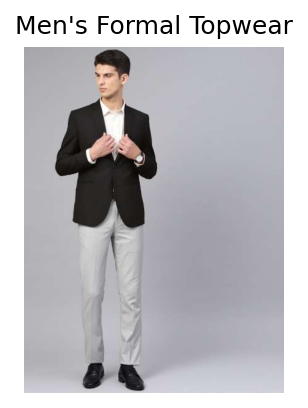

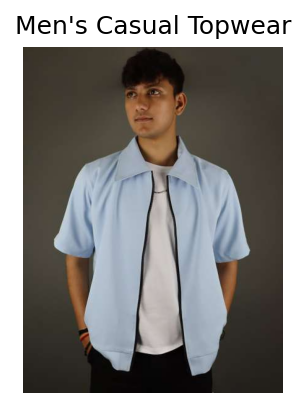

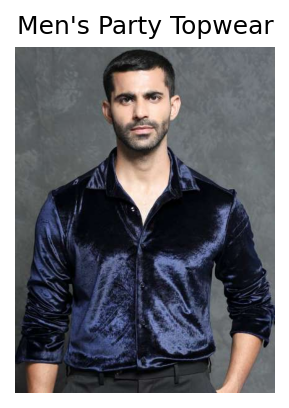

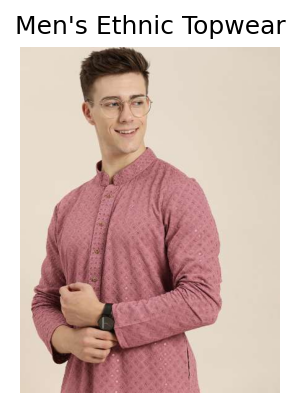

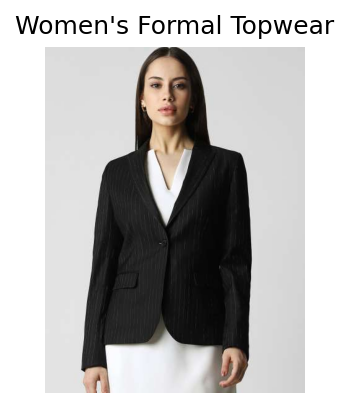

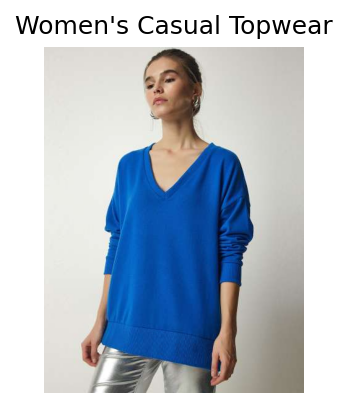

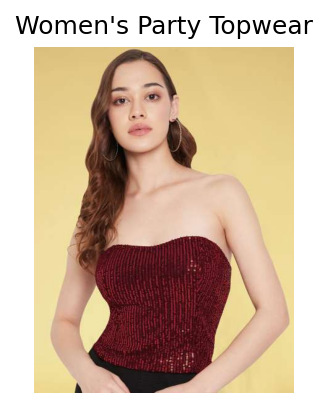

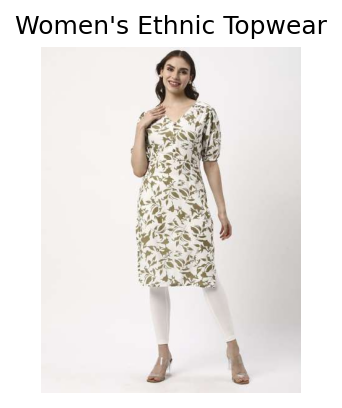

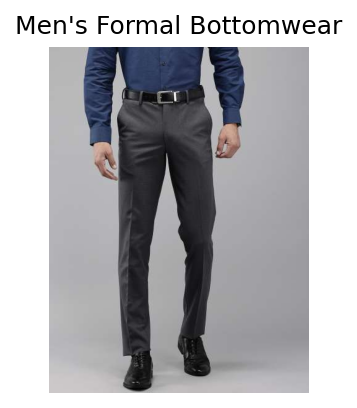

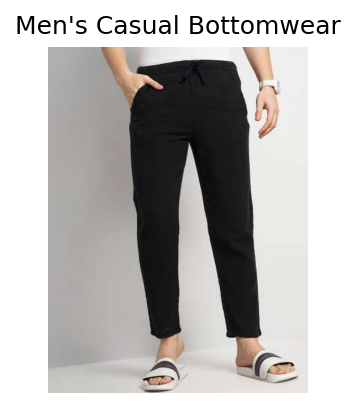

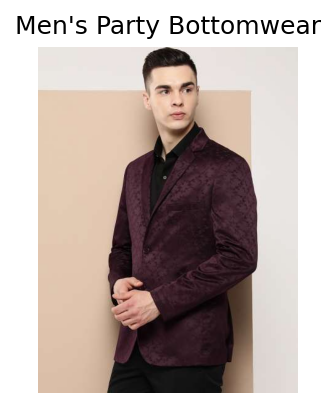

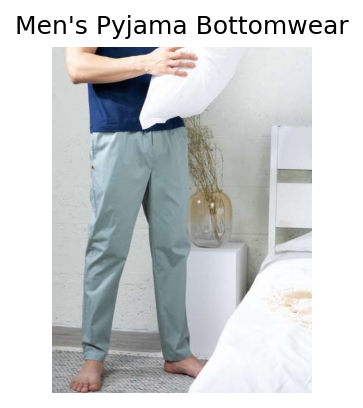

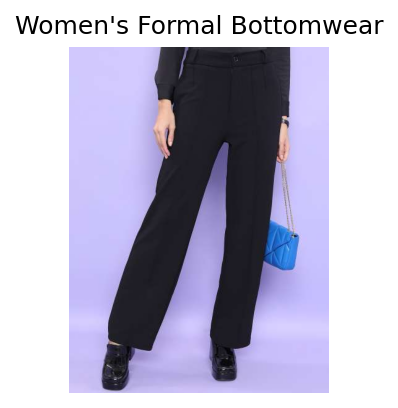

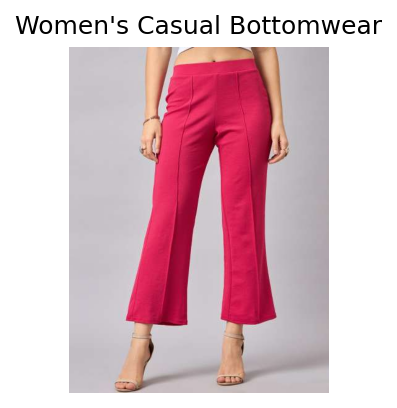

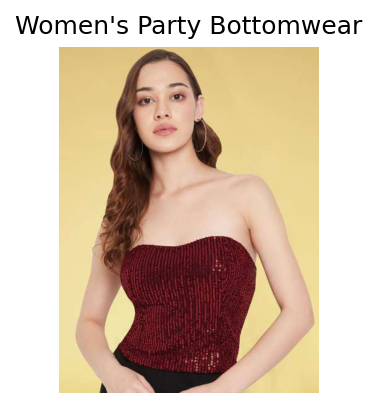

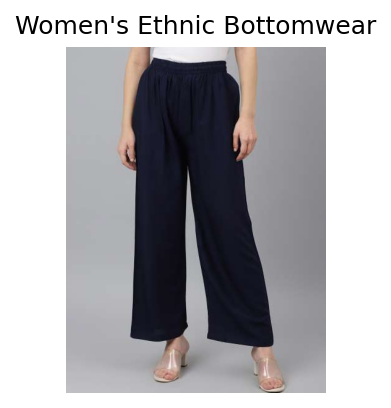

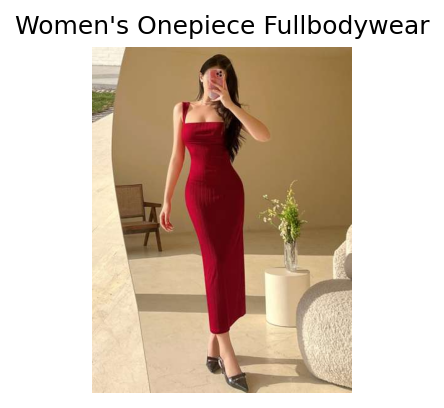

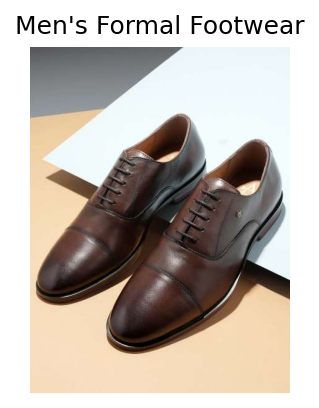

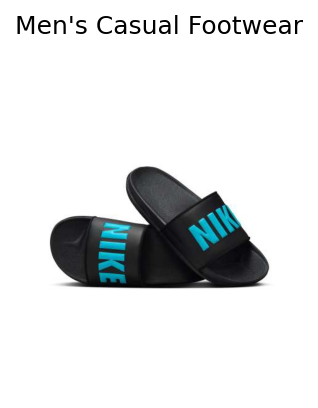

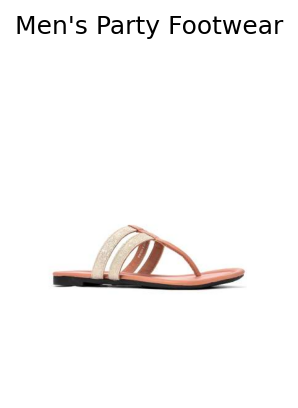

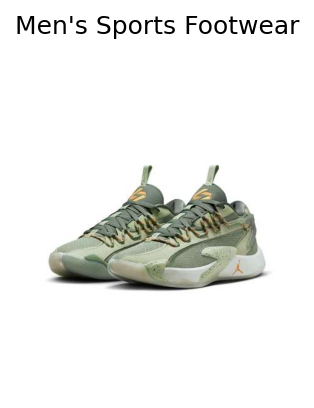

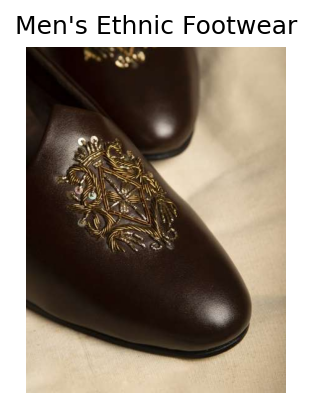

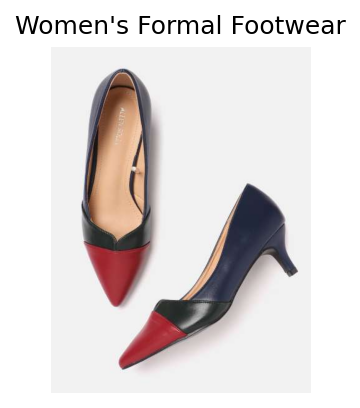

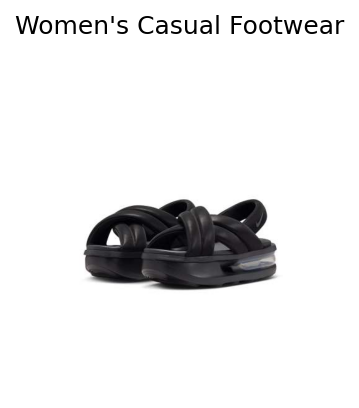

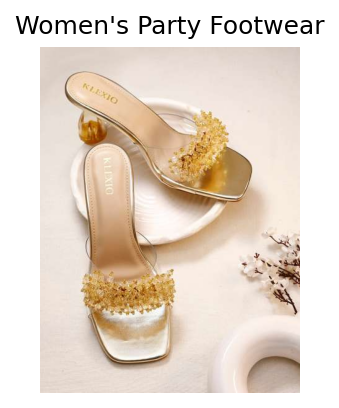

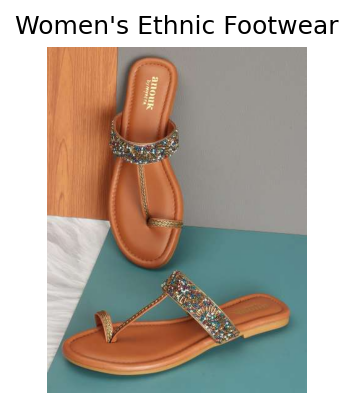

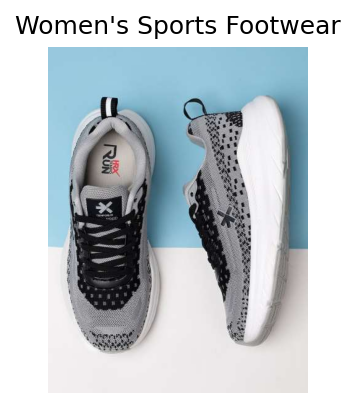

In [31]:
#Lets first edit the words "one" and "piece" that we replace in our dataframe and define search terms list with edited words (also converting letters from upper case to lower)
search_terms = [
                "men topwear formal",
                "men topwear casual",
                "men topwear party",
                "men topwear ethnic",
                "women topwear formal",
                "women topwear casual",
                "women topwear party",
                "women topwear ethnic",
                "men bottomwear formal",
                "men bottomwear casual",
                "men bottomwear party",
                "men bottomwear pyjama",
                "women bottomwear formal",
                "women bottomwear casual",
                "women bottomwear party",
                "women bottomwear ethnic",
                "women fullbodywear onepiece",
                "men footwear formal",
                "men footwear casual",
                "men footwear party",
                "men footwear sports",
                "men footwear ethnic",
                "women footwear formal",
                "women footwear casual",
                "women footwear party",
                "women footwear ethnic",
                "women footwear sports"
               ]


for term in search_terms:
    # Split the term into gender, category, and occasion
    gender, category, occasion = term.split()

    # Filter the DataFrame
    mdf = df[(df.gender == gender) & (df.category == category) & (df.type == occasion)]

    # Check if the filtered DataFrame is not empty
    if not mdf.empty:
                # Get the image URL from the filtered DataFrame
                img_url = mdf.image_url.iloc[0]

                # Load and display the image
                image = io.imread(img_url)
                plt.figure(figsize=(3, 3), dpi=150)
                plt.imshow(image)
                plt.axis("off")
                plt.title(f"{gender}s {occasion} {category}".title().replace("ns", "n's"))
                plt.show()

    else:
                print(f"No data for: {term}")


In [32]:
df["gender"].value_counts()

gender
women    7779
men      6885
Name: count, dtype: int64

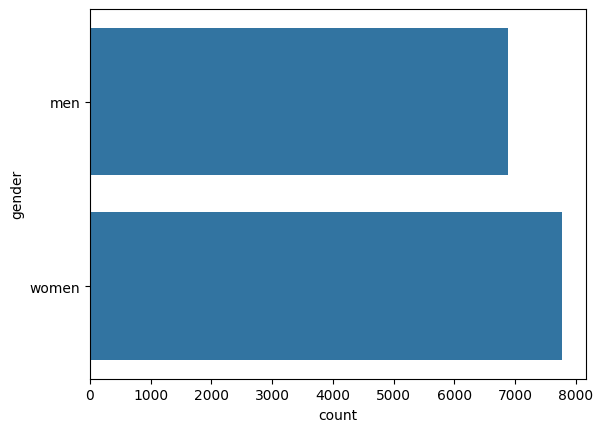

In [33]:
sns.countplot(df.gender)
plt.show()

**Observations:**
- The number of fashion products for Men and women are not distributed equally.
- Around ~7.8k products for Women and ~6.9k products for Men
- The database has a total of ~14.6k Fashion products.

In [34]:
df.category.value_counts()

category
topwear         4761
bottomwear      4736
footwear        4562
fullbodywear     605
Name: count, dtype: int64

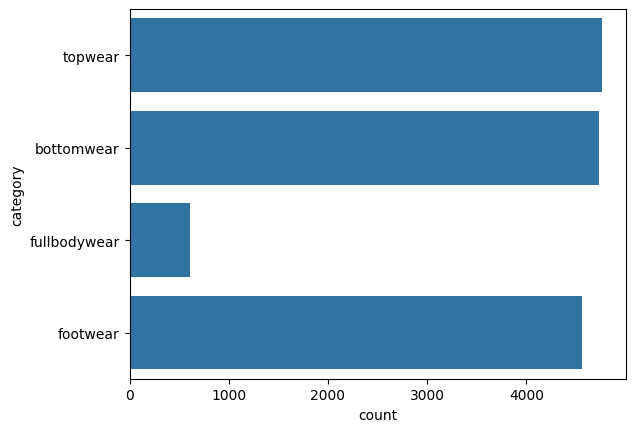

In [35]:
sns.countplot(df.category)
plt.show()

**Observations:**
- Topwears are a majority in the dataset with ~4.76k items whereas fullbodywears are minority with only 605 items.
- The dataset also contains footwears which is around ~4.5k.

In [36]:
df.type.value_counts()

type
casual      3627
party       2970
formal      2940
ethnic      2707
sports      1210
pyjama       605
onepiece     605
Name: count, dtype: int64

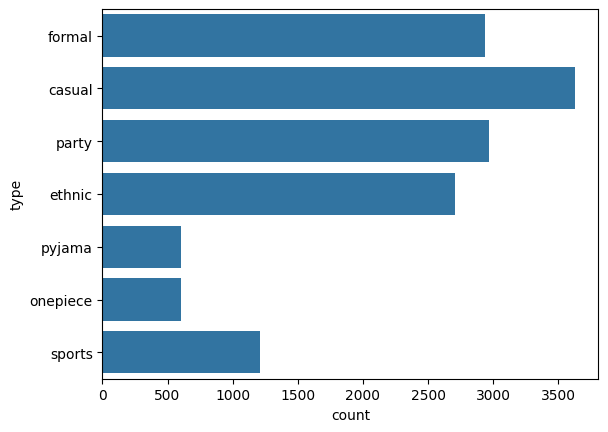

In [37]:
sns.countplot(df.type)
plt.show()

**Observations:**
- Casual clothes are a majority in the dataset with ~3.6k items whereas onepiece clothes & pyjamas are minority with only 605 items.
- Party and formal clothes both are around ~2.9k.
- Ethnic is ~2.7k and sports is around ~1.2k.

In [38]:
combined = df.gender + "'s_" + df.type + "_" + df.category
combined.value_counts()

women's_ethnic_topwear           606
women's_sports_footwear          605
women's_onepiece_fullbodywear    605
women's_ethnic_footwear          605
men's_ethnic_topwear             605
women's_party_footwear           605
women's_casual_footwear          605
women's_party_topwear            605
men's_sports_footwear            605
men's_casual_bottomwear          605
men's_party_bottomwear           605
men's_pyjama_bottomwear          605
men's_casual_footwear            605
men's_casual_topwear             605
men's_formal_footwear            605
women's_ethnic_bottomwear        605
men's_formal_topwear             604
women's_party_bottomwear         604
men's_formal_bottomwear          604
women's_casual_topwear           604
women's_formal_topwear           603
women's_casual_bottomwear        603
men's_party_topwear              529
women's_formal_bottomwear        505
men's_ethnic_footwear            286
men's_party_footwear              22
women's_formal_footwear           19
N

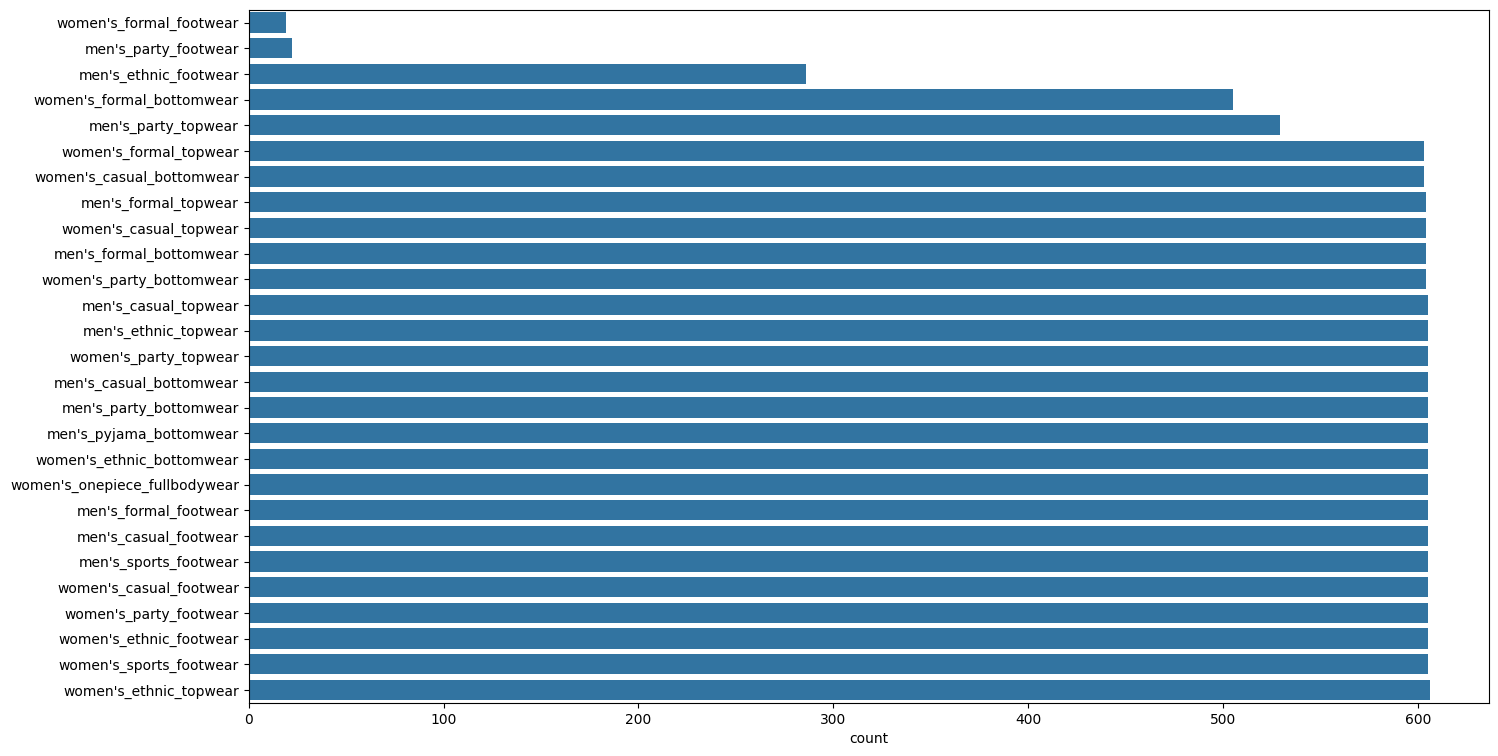

In [39]:
#Now lets see the plots
plt.figure(figsize=(16,9))
sns.countplot(y=sorted(combined, key=lambda x: combined.value_counts()[x]), orient='v')
plt.show()

**Observations:**
- Womens formal footwear and mens party footwear are the least amount in our data.
- Men's ethnic footwear, womens formal bottomwear, mens party topwear are also less in number compared to other categories.